In [48]:
# Importing the Libraries
import pandas as pd
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [49]:
dataset = pd.read_csv("./cpd.csv")

In [50]:
print(dataset.head())

   Temperature   Humidity  kW_Tot  kW_CHH  kW_CHP  kW_CDS  kW_CT     GPM  \
0    30.277778  71.984722   208.7   135.6    23.3    30.9   18.9  1238.0   
1    30.277778  71.984722   203.5   130.4    23.3    30.9   18.9  1238.0   
2    30.277778  71.984722   200.8   127.8    23.3    30.9   18.9  1238.0   
3    30.277778  71.984722   201.2   128.3    23.3    30.6   18.9  1233.0   
4    30.277778  71.984722   181.4   117.6    24.1    30.8    8.9  1282.8   

   DeltaCHW  DeltaCDW  ...  Hour_15  Hour_16  Hour_17  Hour_18  Hour_19  \
0       3.9       3.9  ...        0        0        0        0        0   
1       3.5       3.8  ...        0        0        0        0        0   
2       3.3       3.7  ...        0        0        0        0        0   
3       3.6       3.8  ...        0        0        0        0        0   
4       3.3       3.7  ...        0        0        0        0        0   

   Hour_20  Hour_21  Hour_22  Hour_23  CH Load  
0        0        0        0        0     3

In [51]:
# Setting the Dependent and the Independent Variables
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [52]:
# Splitting the Dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [53]:
# Building the Neural Network
network = tf.keras.models.Sequential()

# Hidden Layers
network.add(tf.keras.layers.Dense(units = 128, activation = "relu"))

network.add(tf.keras.layers.Dense(units = 64, activation = "relu"))

network.add(tf.keras.layers.Dense(units = 32, activation = "relu"))

network.add(tf.keras.layers.Dense(units = 8, activation = "relu"))

# Output Layer
network.add(tf.keras.layers.Dense(units = 1, activation = "linear"))

# Compile
network.compile(optimizer = "adam", loss = "mse", metrics = ["mse"])

# Train
history = network.fit(X_train, y_train, batch_size = 64, epochs = 64, validation_split = 0.2)

Epoch 1/64
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 3200.7285 - mse: 3200.7285 - val_loss: 4.2633 - val_mse: 4.2633
Epoch 2/64
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1412 - mse: 4.1412 - val_loss: 0.3899 - val_mse: 0.3899
Epoch 3/64
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0346 - mse: 1.0346 - val_loss: 0.5335 - val_mse: 0.5335
Epoch 4/64
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8432 - mse: 0.8432 - val_loss: 0.5186 - val_mse: 0.5186
Epoch 5/64
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6782 - mse: 0.6782 - val_loss: 0.3359 - val_mse: 0.3359
Epoch 6/64
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5629 - mse: 0.5629 - val_loss: 0.2174 - val_mse: 0.2174
Epoch 7/64
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4510 - mse: 0.4510 - val_loss: 0.5844 - val_mse: 0.5844
Epoch 8/64
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3778 - mse: 0.3778 - val_loss: 0.2185 - val_mse: 0.2185
Epoch 9/64
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

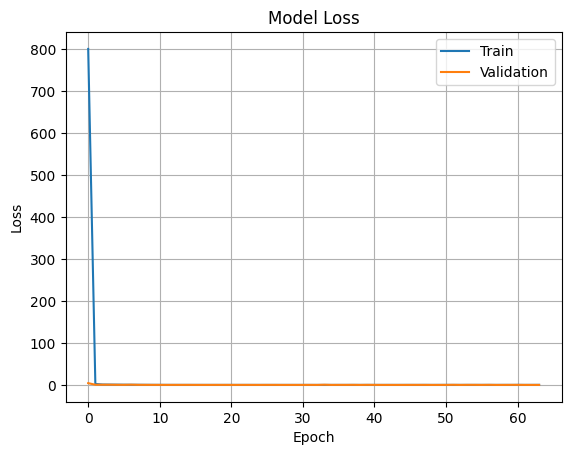

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()

In [55]:
y_pred = network.predict(X_test)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


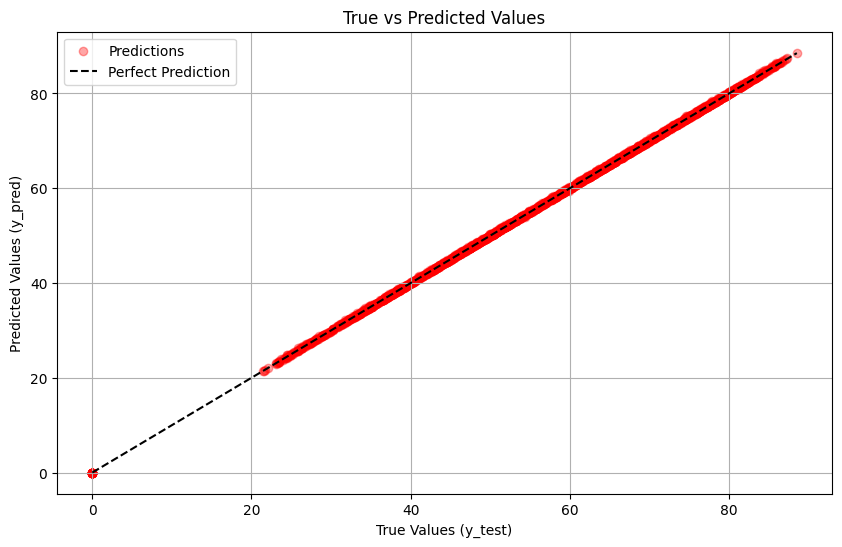

In [56]:
# Flatten y_pred to make it a 1D array
y_pred_flat = y_pred.flatten()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_flat, color = 'red', label = 'Predictions', alpha = 0.35)

# Add a line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'black', linestyle = '--', label = 'Perfect Prediction')

# Adding labels and title
plt.title('True vs Predicted Values')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [57]:
# Save the Network
network.save_weights("./checkpoints/cpd-cp-1.weights.h5")

In [58]:
# Evaluate the Mean Square Error
print('MSE:', network.evaluate(X_test, y_test))

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mse: 0.0113
MSE: [0.013116860762238503, 0.013116860762238503]


In [59]:
# Evaluate the R2 Score
r2_score_metric = tf.keras.metrics.R2Score()
r2_score_metric.update_state(y_test, y_pred)
print('R2 Score:', r2_score_metric.result().numpy())

R2 Score: 0.9999553


# Train a Multi-variable Regression Model

In [60]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [61]:
# Evaluating the Model
y_pred = regressor.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

MSE: 0.009370473810380591
R2 Score: 0.9999680541006902


In [62]:
# Understanding the Model
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)

Intercept: -0.25662706482826536
Coefficients: [ 2.30219547e-03  2.97829671e-04  6.33176558e-02  2.31633158e-01
 -6.47194515e-02 -6.25986764e-02 -6.43693163e-02  5.67762199e-05
 -3.00790143e-03  7.22553939e-03  2.59726291e-05  2.43467322e-03
 -2.24108976e-03  1.30325049e-03 -1.72127874e-03 -8.36101886e-03
 -4.80287196e-04 -8.44839874e-03 -1.31289214e-02 -5.25581404e-03
 -7.83751209e-03 -1.37739951e-02  2.72794131e-03 -5.49547355e-03
 -1.18372428e-02  5.16025310e-03 -8.75067267e-03 -6.30270788e-03
 -6.46284400e-03 -8.06179626e-03 -4.13652055e-03  1.45718563e-03
 -3.07896988e-03 -1.72890624e-02 -5.56658187e-04  6.01702548e-03
 -1.72030692e-02]


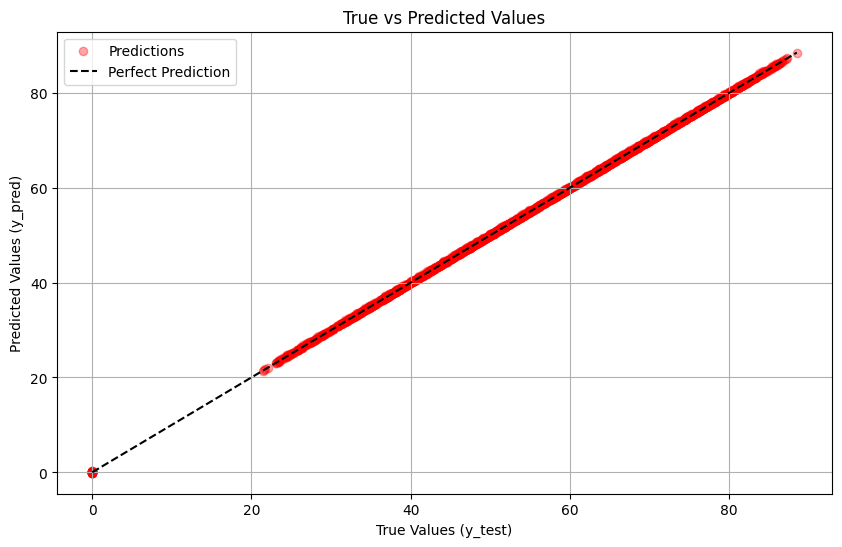

In [63]:
# Plotting the Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color = 'red', label = 'Predictions', alpha = 0.35)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'black', linestyle = '--', label = 'Perfect Prediction')
plt.title('True vs Predicted Values')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid()
plt.show()

In [64]:
# Save the Model
with open('./checkpoints/cpd-regressor.pkl','wb') as f:
    pickle.dump(regressor, f)

# Training a Random Forest Regression Model

In [65]:
rf_regressor = RandomForestRegressor(n_estimators = 37, random_state = 0, oob_score = True)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=37, oob_score=True, random_state=0)

In [66]:
# Evaluating the Model
y_pred = rf_regressor.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

MSE: 0.011381349223446186
R2 Score: 0.9999611986070652


In [67]:
# Understanding the Model
print(f'Out-of-Bag Score: {rf_regressor.oob_score_}')

Out-of-Bag Score: 0.9999543896126558


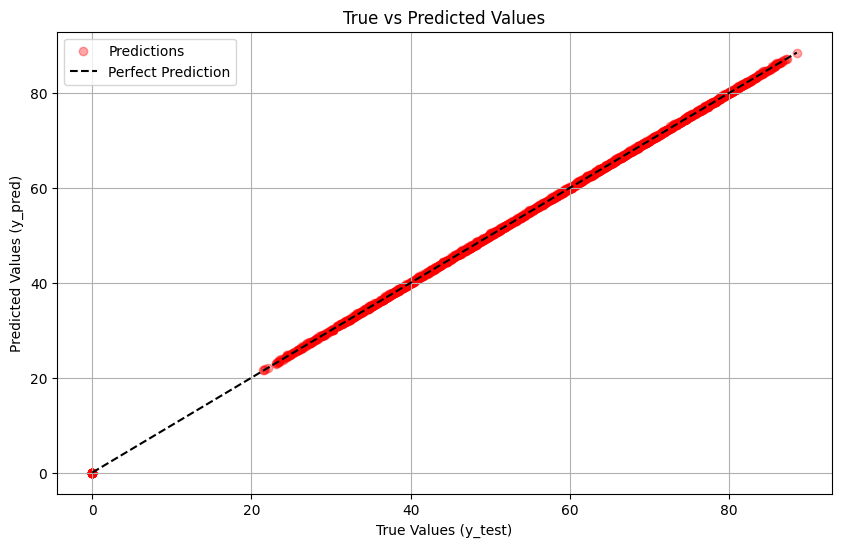

In [68]:
# Plotting the Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color = 'red', label = 'Predictions', alpha = 0.35)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'black', linestyle = '--', label = 'Perfect Prediction')
plt.title('True vs Predicted Values')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid()
plt.show()

In [69]:
# Save the Model
with open('./checkpoints/cpd-rf-regressor.pkl','wb') as f:
    pickle.dump(regressor, f)